In [1]:
#!pip install pandas-datareader

In [2]:
'''
!pip install lxml
import pandas_datareader as pdr
import pandas as pd
'''

'\n!pip install lxml\nimport pandas_datareader as pdr\nimport pandas as pd\n'

In [3]:
#!pip install --upgrade pandas-datareader
#!pip install --upgrade pandas

In [4]:
#import os
#os.environ['TIINGO_API_KEY'] = "12120b99ae7c071a2f7950b0482156305c1ea537"

In [5]:
#df = pdr.get_data_tiingo(symbols='AAPL')

In [6]:
#!pip install --upgrade pandas-datareader

In [7]:
#!pip install --upgrade pandas

In [8]:
#!pip install pandas-datareader==0.10.0

## STARTING END-TO-END PROJECT ON APPLE DATA.

## Importing necessary packages.

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
from datetime import datetime
from numpy import log
from pandas import Series

## Loading Apple share price dataset

In [11]:
df = pd.read_csv('Apple.csv')
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,1,AAPL,2015-05-28,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,2,AAPL,2015-05-29,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,3,AAPL,2015-06-01,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,4,AAPL,2015-06-02,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1
1254,1254,AAPL,2020-05-19,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1
1255,1255,AAPL,2020-05-20,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1
1256,1256,AAPL,2020-05-21,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1


### Necessary EDA and FE.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 147.6+ KB


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1258 non-null   int64         
 1   symbol       1258 non-null   object        
 2   date         1258 non-null   datetime64[ns]
 3   close        1258 non-null   float64       
 4   high         1258 non-null   float64       
 5   low          1258 non-null   float64       
 6   open         1258 non-null   float64       
 7   volume       1258 non-null   int64         
 8   adjClose     1258 non-null   float64       
 9   adjHigh      1258 non-null   float64       
 10  adjLow       1258 non-null   float64       
 11  adjOpen      1258 non-null   float64       
 12  adjVolume    1258 non-null   int64         
 13  divCash      1258 non-null   float64       
 14  splitFactor  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(4), object(1)
m

In [14]:
df.describe()
# the quartile values of the column to be forecasted are used to make insights, for eg: when to buy/sell shares

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,2017-11-22 14:13:55.612082688,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
min,0.000000,2015-05-27 00:00:00,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,2016-08-23 06:00:00,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,2017-11-20 12:00:00,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,2019-02-24 06:00:00,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,2020-05-22 00:00:00,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337148,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0
std,363.297628,NaN,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0


In [15]:
df.isnull().sum()     #no missing data: necessary for Time series

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [16]:
# we only need the necessary columns: 'date' and 'close'
ds = df[['date','close']]
ds

,date,close
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [17]:
#setting date column as index
ds.set_index('date', inplace = True)
ds.head()

,close
date,
2015-05-27,132.045
2015-05-28,131.780
2015-05-29,130.280
2015-06-01,130.535
2015-06-02,129.960


In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-27 to 2020-05-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


## Plot to see the Trend in dataset

<Axes: xlabel='date'>

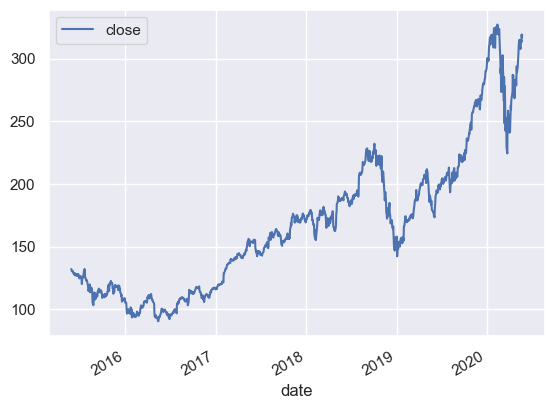

In [19]:
ds.plot()
#somewhat upward trend

## Decomposition method to check all three components in the dataset:
### -- trend, seasonality, noise

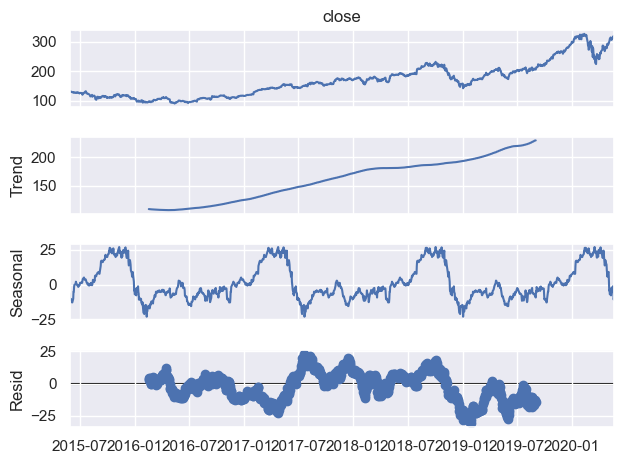

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ds['close'], period = 365)
decompose.plot()
plt.show()

## Check Auto-Correlation using Durbin-Watson Test

In [21]:
import statsmodels.api as sm
sm.stats.durbin_watson(ds)

array([0.00042847])

In [22]:
# HIGHLY POSITIVE AUTO-CORRELATION FOUND!!

### CHECKING WHETHER DATA IS STATIONARY OR NOT USING AUGMENTED DICKEY FULLER TEST METHOD

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary')
    print('---------------------------------------------------------------------------------')
    labels = ['ADF Test Statistic', 'p-value', '#Lags used', 'Number of observations used']

    for a, b in zip(result, labels):
        print(b + ' : ' +str(a))
        print('-----------')

    if result[1] <= 0.05:
        print('Strong evidence against Null hypothesis and my time series is Stationary.')
    else:
        print('Weak evidence against Null hypothesis and my time series is Non-stationary.')

adf_check(ds['close'])

Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary
---------------------------------------------------------------------------------
ADF Test Statistic : -0.10012966467734916
-----------
p-value : 0.9494256168598441
-----------
#Lags used : 18
-----------
Number of observations used : 1239
-----------
Weak evidence against Null hypothesis and my time series is Non-stationary.


## Making data stationary using Lag Function !!

In [25]:
ds['1st diff'] = ds['close'] - ds['close'].shift(1)
ds

,close,1st diff
date,,
2015-05-27,132.045,NaN
2015-05-28,131.780,-0.265
2015-05-29,130.280,-1.500
2015-06-01,130.535,0.255
2015-06-02,129.960,-0.575
...,...,...
2020-05-18,314.960,7.250
2020-05-19,313.140,-1.820
2020-05-20,319.230,6.090


In [26]:
# Checking again whether data is stationary or non-stationary
adf_check(ds['1st diff'].dropna())

Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary
---------------------------------------------------------------------------------
ADF Test Statistic : -6.239529846021893
-----------
p-value : 4.734448928660651e-08
-----------
#Lags used : 17
-----------
Number of observations used : 1239
-----------
Strong evidence against Null hypothesis and my time series is Stationary.


### data is now stationary, therefore we get d = 1.

## To find D for Seasonality,
### our seasonality period is 30 days, therefore you compare the first month data with the second, the second month with the third and so on..

In [27]:
# Checking if Seasonality data is Stationary or not:
ds['30d diff'] = ds['close'] - ds['close'].shift(30)
ds.head(50)

,close,1st diff,30d diff
date,,,
2015-05-27,132.045,NaN,NaN
2015-05-28,131.780,-0.265,NaN
2015-05-29,130.280,-1.500,NaN
2015-06-01,130.535,0.255,NaN
2015-06-02,129.960,-0.575,NaN
2015-06-03,130.120,0.160,NaN
2015-06-04,129.360,-0.760,NaN
2015-06-05,128.650,-0.710,NaN
2015-06-08,127.800,-0.850,NaN


In [28]:
adf_check(ds['30d diff'].dropna())

Augmented Dickey Fuller Test- Check whether data is stationary or non-stationary
---------------------------------------------------------------------------------
ADF Test Statistic : -7.144467547383239
-----------
p-value : 3.25981570523404e-10
-----------
#Lags used : 22
-----------
Number of observations used : 1205
-----------
Strong evidence against Null hypothesis and my time series is Stationary.


## Both Trend and Seasonality are STATIONARY !!
### Trend, d = 1.
### Seasonality, D = 1.

### For p, q, P and Q: we will check Partial Auto-Correlation and Auto-Correlation using visalization method.

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

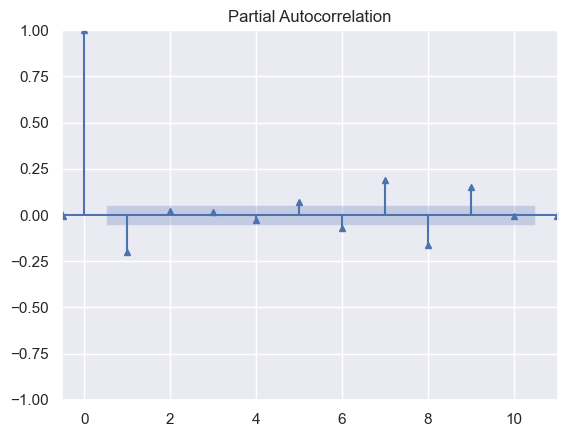

In [30]:
# First target: Trend
# p = partial auto-correlation = ?
# q = auto-correlation = ?
# d = difference = 1

plot_pacf(ds['1st diff'].dropna(), lags = 10, marker = '^')
plt.show()

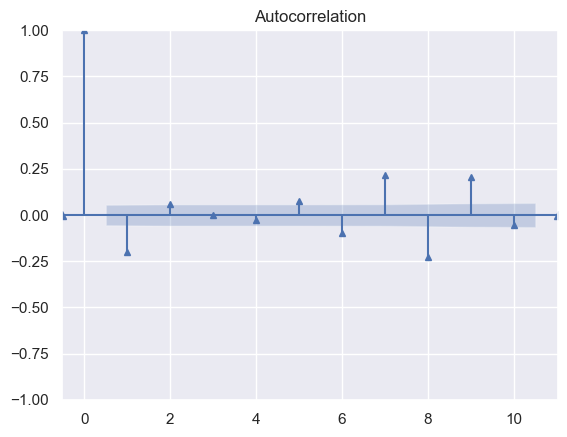

In [31]:
plot_acf(ds['1st diff'].dropna(), lags = 10, marker = '^')
plt.show()


## First target: Trend
## p = partial auto-correlation = 1
## q = auto-correlation = 2
## d = difference = 1

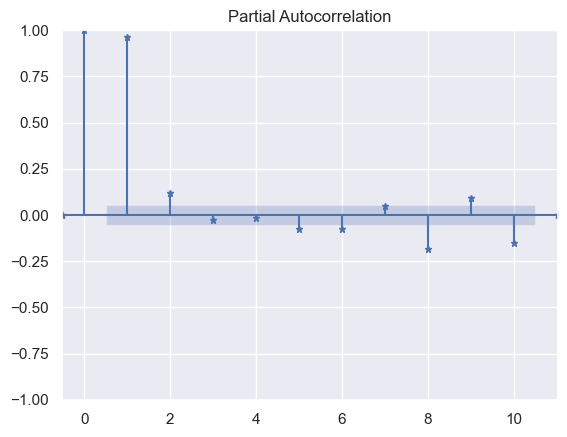

In [32]:
# Second Target : trend
# P = partial auto-correlation = ?
# Q = auto-correlation = ?
# D = difference = 1

plot_pacf(ds['30d diff'].dropna(), lags = 10, marker = '*')
plt.show()

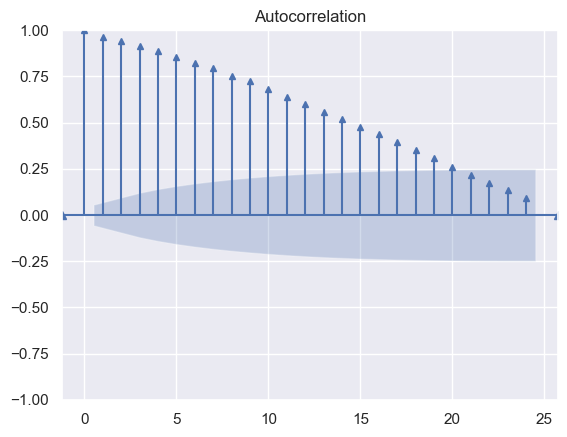

In [33]:
plot_acf(ds['30d diff'].dropna(), lags = 24, marker = '^')
plt.show()

## Second target: Seasonality
## P = partial auto-correlation = 2
## Q = auto-correlation = 20
## D = difference = 1



## USING FACEBOOK PROPHET MODEL

In [40]:
!pip install pystan

  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/3f/7f/657d722f81035931513a9760751a215f09fb1474c15c043b5a5ed17e61ca/pystan-3.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for clikit<0.7,>=0.6 from https://files.pythonhosted.org/packages/f2/3d/4394c710b9195b83382dc67bdd1040e5ebfc3fc8df90e20fe74341298c57/clikit-0.6.2-py2.py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/20/e7/726e923d328524d0151080f5a1d20f57a025b6d2f72a252c2d2d7abe57f9/pystan-3.9.1-py3-none-any.whl.metadata
  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/36/dc/e84dcee309f00384674bd4571085a1daada182552a0fbc83231672539b4b/pystan-3.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for pystan from htt

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\HP\AppData\Local\Temp\pip-install-3xjuhezc\pystan_176919321831441e853ce4c5fbd3eab1\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [41]:
!python -m pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/b4/14/f330d47e1363c742e595605bc3575c880204901b3820dcb9e807ea49bcc8/holidays-0.66-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [42]:
import prophet

In [43]:
df = df[['date', 'close']]

In [44]:
# FACEBOOK PROPHET MODEL
df_prophet = df.rename(columns = {'date': 'ds', 'close': 'y'})
df_prophet.head()

,ds,y
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960


In [45]:
from prophet import Prophet

In [46]:
m = Prophet()
model = m.fit(df_prophet)

11:44:33 - cmdstanpy - INFO - Chain [1] start processing
11:44:34 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [48]:
#Build Time Series Forecasting Model
future_price = model.make_future_dataframe(periods = 365, freq = 'D')
future_price

,ds
0,2015-05-27
1,2015-05-28
2,2015-05-29
3,2015-06-01
4,2015-06-02
...,...
1618,2021-05-18
1619,2021-05-19
1620,2021-05-20
1621,2021-05-21


In [49]:
df_prophet.shape

(1258, 2)

In [50]:
future_price.shape

(1623, 1)

In [51]:
prediction = model.predict(future_price)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,132.383157,115.005288,146.279625,132.383157,132.383157,-2.197372,-2.197372,-2.197372,0.629502,0.629502,0.629502,-2.826873,-2.826873,-2.826873,0.0,0.0,0.0,130.185785
1,2015-05-28,132.239519,114.974197,145.345292,132.239519,132.239519,-2.528267,-2.528267,-2.528267,0.528054,0.528054,0.528054,-3.056322,-3.056322,-3.056322,0.0,0.0,0.0,129.711251
2,2015-05-29,132.095881,113.007008,143.252493,132.095881,132.095881,-3.057380,-3.057380,-3.057380,0.227765,0.227765,0.227765,-3.285145,-3.285145,-3.285145,0.0,0.0,0.0,129.038501
3,2015-06-01,131.664967,112.601869,143.518189,131.664967,131.664967,-3.871965,-3.871965,-3.871965,0.071562,0.071562,0.071562,-3.943528,-3.943528,-3.943528,0.0,0.0,0.0,127.793002
4,2015-06-02,131.521329,112.762530,143.799470,131.521329,131.521329,-3.668058,-3.668058,-3.668058,0.478972,0.478972,0.478972,-4.147030,-4.147030,-4.147030,0.0,0.0,0.0,127.853271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,419.298412,362.605587,479.480632,364.737732,478.714929,-0.774267,-0.774267,-0.774267,0.478972,0.478972,0.478972,-1.253239,-1.253239,-1.253239,0.0,0.0,0.0,418.524145
1619,2021-05-19,419.605406,362.160288,480.367061,364.973915,479.201440,-0.745290,-0.745290,-0.745290,0.629502,0.629502,0.629502,-1.374791,-1.374791,-1.374791,0.0,0.0,0.0,418.860116
1620,2021-05-20,419.912400,361.227782,479.887986,365.264223,479.647550,-0.990283,-0.990283,-0.990283,0.528054,0.528054,0.528054,-1.518337,-1.518337,-1.518337,0.0,0.0,0.0,418.922117
1621,2021-05-21,420.219394,359.709108,477.116287,365.557970,480.093660,-1.454187,-1.454187,-1.454187,0.227765,0.227765,0.227765,-1.681952,-1.681952,-1.681952,0.0,0.0,0.0,418.765207


In [52]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [53]:
prediction[['ds', 'yhat_lower', 'yhat_upper','yhat']].tail(20)

,ds,yhat_lower,yhat_upper,yhat
1603,2021-05-03,361.344897,471.204544,412.808204
1604,2021-05-04,361.117480,470.131401,413.651612
1605,2021-05-05,360.792785,474.511956,414.238842
1606,2021-05-06,362.850020,470.649703,414.571629
1607,2021-05-07,360.437879,471.889307,414.699846
1608,2021-05-08,359.312036,473.362805,413.923674
1609,2021-05-09,359.087182,473.978440,414.331048
1610,2021-05-10,362.358680,475.807803,415.762788
1611,2021-05-11,360.886346,477.560667,416.544616
1612,2021-05-12,363.578406,477.485501,417.049369


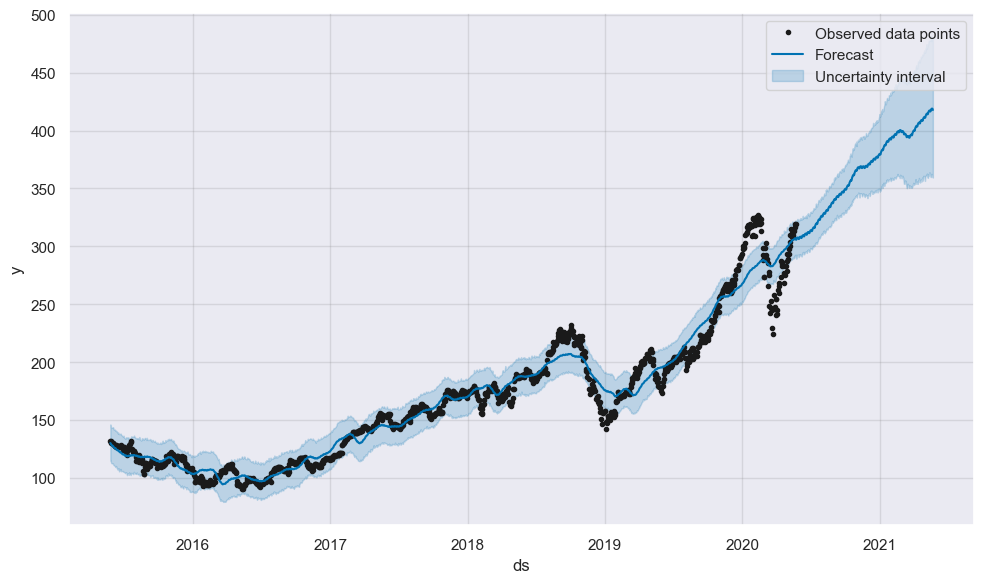

In [54]:
model.plot(prediction, include_legend = True)
plt.show()

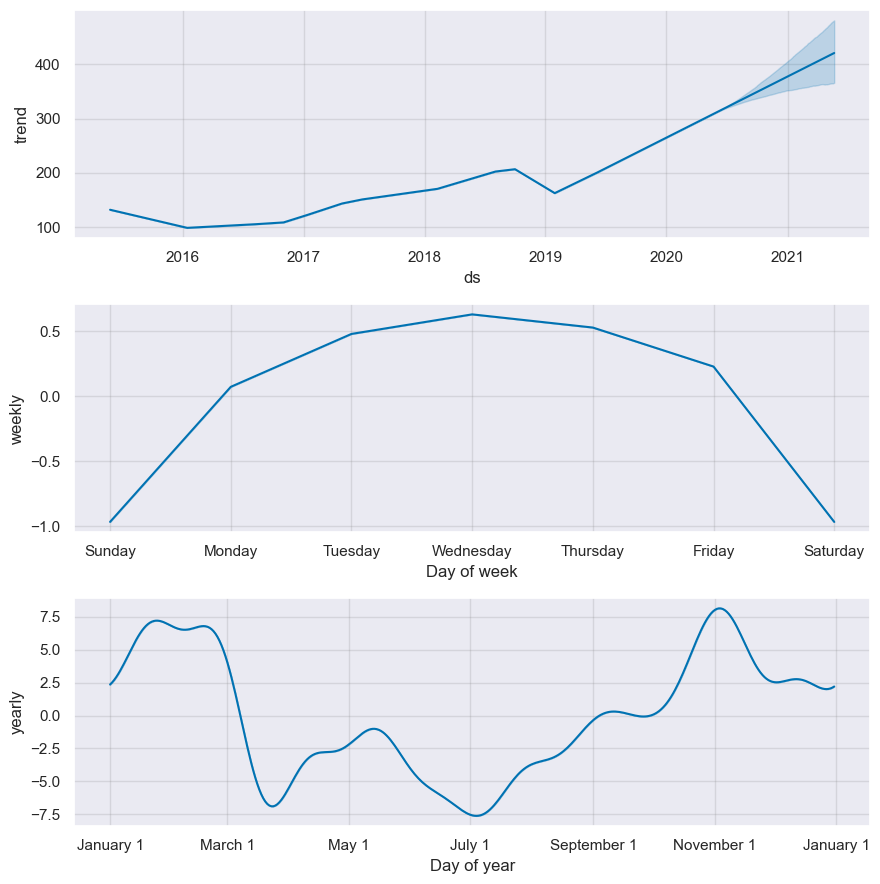

In [55]:
model.plot_components(prediction)
plt.show()

In [56]:
# cross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '100 days', period = '50 days', initial = '300 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/29 [00:00<?, ?it/s]

11:44:39 - cmdstanpy - INFO - Chain [1] start processing
11:44:39 - cmdstanpy - INFO - Chain [1] done processing
11:44:39 - cmdstanpy - INFO - Chain [1] start processing
11:44:39 - cmdstanpy - INFO - Chain [1] done processing
11:44:40 - cmdstanpy - INFO - Chain [1] start processing
11:44:40 - cmdstanpy - INFO - Chain [1] done processing
11:44:40 - cmdstanpy - INFO - Chain [1] start processing
11:44:40 - cmdstanpy - INFO - Chain [1] done processing
11:44:41 - cmdstanpy - INFO - Chain [1] start processing
11:44:41 - cmdstanpy - INFO - Chain [1] done processing
11:44:41 - cmdstanpy - INFO - Chain [1] start processing
11:44:41 - cmdstanpy - INFO - Chain [1] done processing
11:44:42 - cmdstanpy - INFO - Chain [1] start processing
11:44:42 - cmdstanpy - INFO - Chain [1] done processing
11:44:42 - cmdstanpy - INFO - Chain [1] start processing
11:44:42 - cmdstanpy - INFO - Chain [1] done processing
11:44:43 - cmdstanpy - INFO - Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1]

In [57]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,272.699942,16.513629,11.860714,0.067165,0.047425,0.066212,0.315000
1,11 days,281.749838,16.785405,12.208058,0.069101,0.053172,0.068389,0.310000
2,12 days,273.196623,16.528661,12.101032,0.068898,0.058111,0.068414,0.326190
3,13 days,286.085504,16.914062,12.452456,0.070626,0.062145,0.070271,0.331579
4,14 days,310.452086,17.619651,13.139562,0.074415,0.065134,0.073939,0.331500
...,...,...,...,...,...,...,...,...
86,96 days,1569.878551,39.621693,30.384655,0.160528,0.130034,0.163108,0.136000
87,97 days,1452.847704,38.116239,29.291473,0.154738,0.130034,0.157783,0.145000
88,98 days,1398.767362,37.400098,28.753948,0.150970,0.130034,0.153953,0.154737
89,99 days,1482.693984,38.505766,29.602534,0.154536,0.139694,0.157094,0.162143


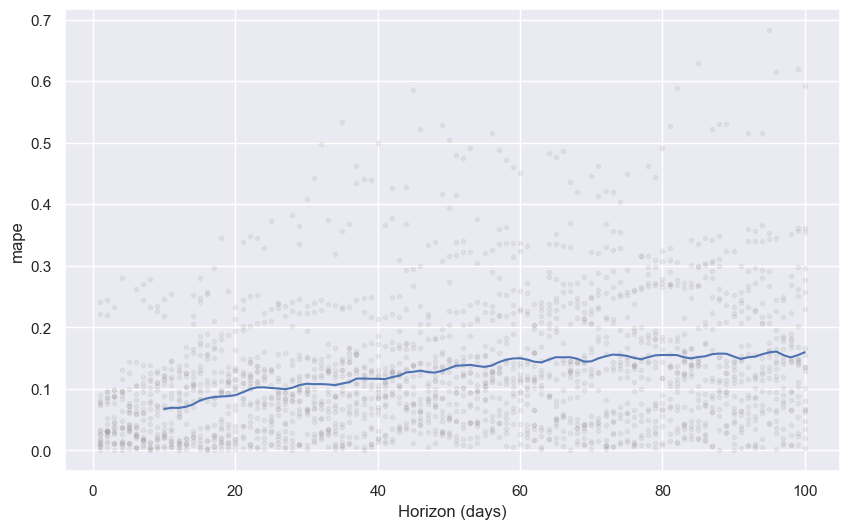

In [58]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mape')

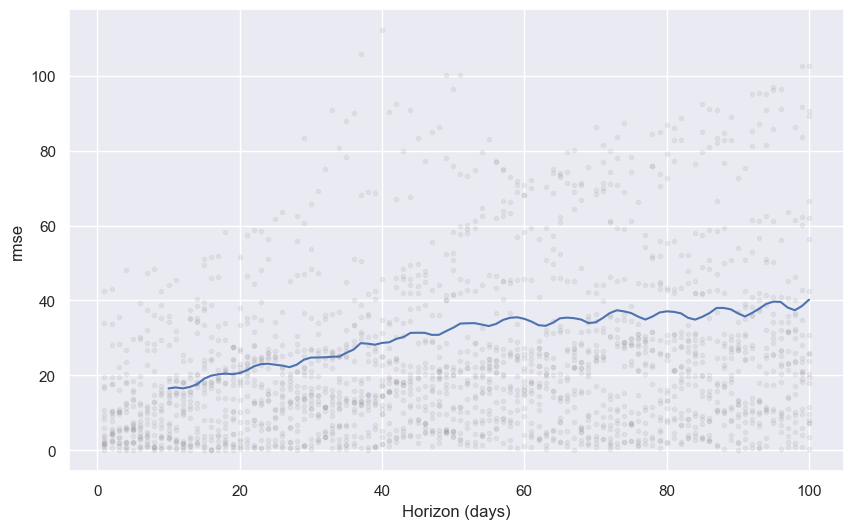

In [59]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')

In [60]:
df_prophet

,ds,y
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [61]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,132.383157,115.005288,146.279625,132.383157,132.383157,-2.197372,-2.197372,-2.197372,0.629502,0.629502,0.629502,-2.826873,-2.826873,-2.826873,0.0,0.0,0.0,130.185785
1,2015-05-28,132.239519,114.974197,145.345292,132.239519,132.239519,-2.528267,-2.528267,-2.528267,0.528054,0.528054,0.528054,-3.056322,-3.056322,-3.056322,0.0,0.0,0.0,129.711251
2,2015-05-29,132.095881,113.007008,143.252493,132.095881,132.095881,-3.057380,-3.057380,-3.057380,0.227765,0.227765,0.227765,-3.285145,-3.285145,-3.285145,0.0,0.0,0.0,129.038501
3,2015-06-01,131.664967,112.601869,143.518189,131.664967,131.664967,-3.871965,-3.871965,-3.871965,0.071562,0.071562,0.071562,-3.943528,-3.943528,-3.943528,0.0,0.0,0.0,127.793002
4,2015-06-02,131.521329,112.762530,143.799470,131.521329,131.521329,-3.668058,-3.668058,-3.668058,0.478972,0.478972,0.478972,-4.147030,-4.147030,-4.147030,0.0,0.0,0.0,127.853271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,419.298412,362.605587,479.480632,364.737732,478.714929,-0.774267,-0.774267,-0.774267,0.478972,0.478972,0.478972,-1.253239,-1.253239,-1.253239,0.0,0.0,0.0,418.524145
1619,2021-05-19,419.605406,362.160288,480.367061,364.973915,479.201440,-0.745290,-0.745290,-0.745290,0.629502,0.629502,0.629502,-1.374791,-1.374791,-1.374791,0.0,0.0,0.0,418.860116
1620,2021-05-20,419.912400,361.227782,479.887986,365.264223,479.647550,-0.990283,-0.990283,-0.990283,0.528054,0.528054,0.528054,-1.518337,-1.518337,-1.518337,0.0,0.0,0.0,418.922117
1621,2021-05-21,420.219394,359.709108,477.116287,365.557970,480.093660,-1.454187,-1.454187,-1.454187,0.227765,0.227765,0.227765,-1.681952,-1.681952,-1.681952,0.0,0.0,0.0,418.765207


# Hyper-tunng Prophet Model parameters


In [62]:
param_grid = {
     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
 }

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []

for params in all_params:
     m = Prophet(**params).fit(df_prophet)
     df_cv = cross_validation(m, horizon='100 days', period='50 days', initial='300 days', parallel="processes")
     df_p = performance_metrics(df_cv, rolling_window=1)
     rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
best_params = all_params[np.argmin(rmses)]
print(best_params)

11:44:56 - cmdstanpy - INFO - Chain [1] start processing
11:44:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
11:45:14 - cmdstanpy - INFO - Chain [1] start processing
11:45:14 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
11:45:31 - cmdstanpy - INFO - Chain [1] start processing
11:45:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
11:45:46 - cmdstanpy - INFO - Chain [1] start processing
11:45:46 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
11:46:01 - cmdstanpy - INFO - Chain [1] start processing
11:46:01 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has per

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  35.407531
1                     0.001                     0.10  36.505709
2                     0.001                     1.00  44.262091
3                     0.001                    10.00  44.809266
4                     0.010                     0.01  31.491890
5                     0.010                     0.10  31.930660
6                     0.010                     1.00  31.902853
7                     0.010                    10.00  31.947027
8                     0.100                     0.01  30.334229
9                     0.100                     0.10  32.817154
10                    0.100                     1.00  32.821701
11                    0.100                    10.00  32.786347
12                    0.500                     0.01  29.994729
13                    0.500                     0.10  33.974857
14                    0.500             

In [63]:
m = Prophet(**best_params)
model = m.fit(df_prophet)

11:48:57 - cmdstanpy - INFO - Chain [1] start processing
11:48:58 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 0.01,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 0.01,
               'mode': 'additive',
               'condition_name': None})])

In [65]:
#Build Time Series Forecasting Model
future_price = model.make_future_dataframe(periods = 365, freq = 'D')
future_price

,ds
0,2015-05-27
1,2015-05-28
2,2015-05-29
3,2015-06-01
4,2015-06-02
...,...
1618,2021-05-18
1619,2021-05-19
1620,2021-05-20
1621,2021-05-21


In [66]:
df_prophet.shape

(1258, 2)

In [67]:
future_price.shape

(1623, 1)

In [68]:
prediction = model.predict(future_price)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,145.820279,124.731634,145.986744,145.820279,145.820279,-9.982890,-9.982890,-9.982890,0.360747,0.360747,0.360747,-10.343637,-10.343637,-10.343637,0.0,0.0,0.0,135.837389
1,2015-05-28,145.711868,124.907640,144.530430,145.711868,145.711868,-10.678666,-10.678666,-10.678666,0.138849,0.138849,0.138849,-10.817515,-10.817515,-10.817515,0.0,0.0,0.0,135.033202
2,2015-05-29,145.603457,124.246630,143.852246,145.603457,145.603457,-11.445482,-11.445482,-11.445482,-0.153798,-0.153798,-0.153798,-11.291683,-11.291683,-11.291683,0.0,0.0,0.0,134.157975
3,2015-06-01,145.278223,122.412408,142.960571,145.278223,145.278223,-13.029754,-13.029754,-13.029754,-0.365012,-0.365012,-0.365012,-12.664742,-12.664742,-12.664742,0.0,0.0,0.0,132.248469
4,2015-06-02,145.169811,120.849449,142.566973,145.169811,145.169811,-13.055257,-13.055257,-13.055257,0.035476,0.035476,0.035476,-13.090733,-13.090733,-13.090733,0.0,0.0,0.0,132.114554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,400.921396,12.098628,792.214336,14.477574,801.191685,-7.028100,-7.028100,-7.028100,0.035476,0.035476,0.035476,-7.063575,-7.063575,-7.063575,0.0,0.0,0.0,393.893296
1619,2021-05-19,401.195360,11.851801,792.442827,12.818805,803.081645,-6.970930,-6.970930,-6.970930,0.360747,0.360747,0.360747,-7.331677,-7.331677,-7.331677,0.0,0.0,0.0,394.224430
1620,2021-05-20,401.469325,7.329074,796.654082,11.509303,804.851520,-7.500271,-7.500271,-7.500271,0.138849,0.138849,0.138849,-7.639120,-7.639120,-7.639120,0.0,0.0,0.0,393.969053
1621,2021-05-21,401.743289,5.306687,798.652102,10.377996,806.621395,-8.136879,-8.136879,-8.136879,-0.153798,-0.153798,-0.153798,-7.983080,-7.983080,-7.983080,0.0,0.0,0.0,393.606411


In [69]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [70]:
prediction[['ds', 'yhat_lower', 'yhat_upper','yhat']].tail(20)

,ds,yhat_lower,yhat_upper,yhat
1603,2021-05-03,28.114158,760.818681,389.105230
1604,2021-05-04,27.801243,761.930053,389.938740
1605,2021-05-05,27.454535,766.912673,390.696377
1606,2021-05-06,24.141852,774.560069,390.901453
1607,2021-05-07,18.405921,773.954785,391.025453
1608,2021-05-08,23.572261,774.793363,391.596844
1609,2021-05-09,19.954980,778.204245,391.929125
1610,2021-05-10,22.196747,776.336789,391.952739
1611,2021-05-11,21.499081,780.057969,392.679950
1612,2021-05-12,15.770099,787.350766,393.298621


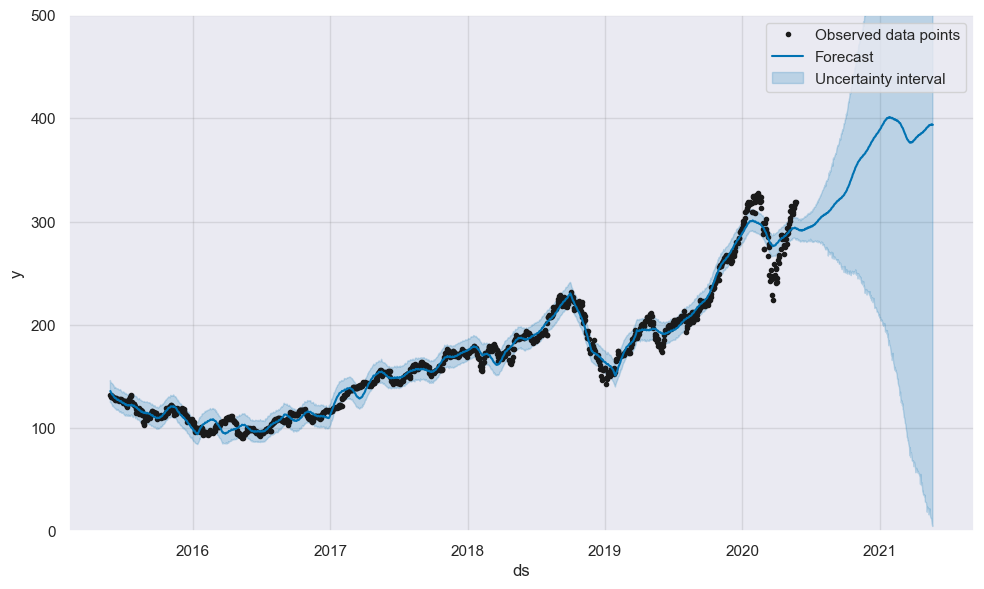

In [71]:
fig = model.plot(prediction, include_legend = True)
ax = fig.gca()
ax.set_ylim([0, 500])
plt.show()

# we can see better accuracy in model performance now.

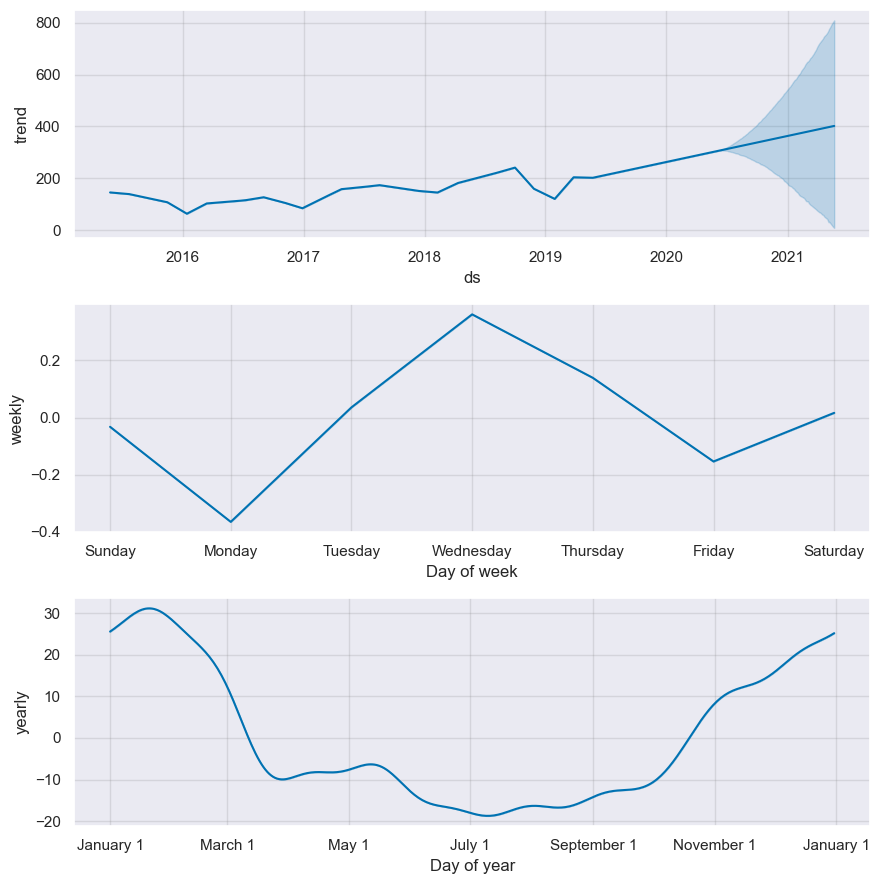

In [72]:
model.plot_components(prediction)
plt.show()

In [73]:
# cross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '100 days', period = '50 days', initial = '300 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/29 [00:00<?, ?it/s]

11:49:02 - cmdstanpy - INFO - Chain [1] start processing
11:49:02 - cmdstanpy - INFO - Chain [1] done processing
11:49:02 - cmdstanpy - INFO - Chain [1] start processing
11:49:03 - cmdstanpy - INFO - Chain [1] done processing
11:49:03 - cmdstanpy - INFO - Chain [1] start processing
11:49:03 - cmdstanpy - INFO - Chain [1] done processing
11:49:03 - cmdstanpy - INFO - Chain [1] start processing
11:49:04 - cmdstanpy - INFO - Chain [1] done processing
11:49:04 - cmdstanpy - INFO - Chain [1] start processing
11:49:04 - cmdstanpy - INFO - Chain [1] done processing
11:49:05 - cmdstanpy - INFO - Chain [1] start processing
11:49:05 - cmdstanpy - INFO - Chain [1] done processing
11:49:06 - cmdstanpy - INFO - Chain [1] start processing
11:49:06 - cmdstanpy - INFO - Chain [1] done processing
11:49:07 - cmdstanpy - INFO - Chain [1] start processing
11:49:08 - cmdstanpy - INFO - Chain [1] done processing
11:49:08 - cmdstanpy - INFO - Chain [1] start processing
11:49:08 - cmdstanpy - INFO - Chain [1]

In [74]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,90.102333,9.492225,7.374043,0.041187,0.036306,0.041201,0.280000
1,11 days,95.559219,9.775440,7.693121,0.042923,0.037908,0.042996,0.270000
2,12 days,106.519997,10.320853,8.076362,0.045231,0.040936,0.045320,0.252143
3,13 days,131.382984,11.462242,8.777571,0.048950,0.046713,0.048937,0.241316
4,14 days,150.391470,12.263420,9.340461,0.051778,0.049123,0.051666,0.236250
...,...,...,...,...,...,...,...,...
86,96 days,1684.324666,41.040525,29.173843,0.152721,0.125607,0.152539,0.783750
87,97 days,1579.546788,39.743513,28.547557,0.150608,0.128934,0.150380,0.800000
88,98 days,1536.786665,39.201871,28.715917,0.151770,0.130374,0.151163,0.806053
89,99 days,1618.398502,40.229324,29.477662,0.154660,0.131936,0.153711,0.802143


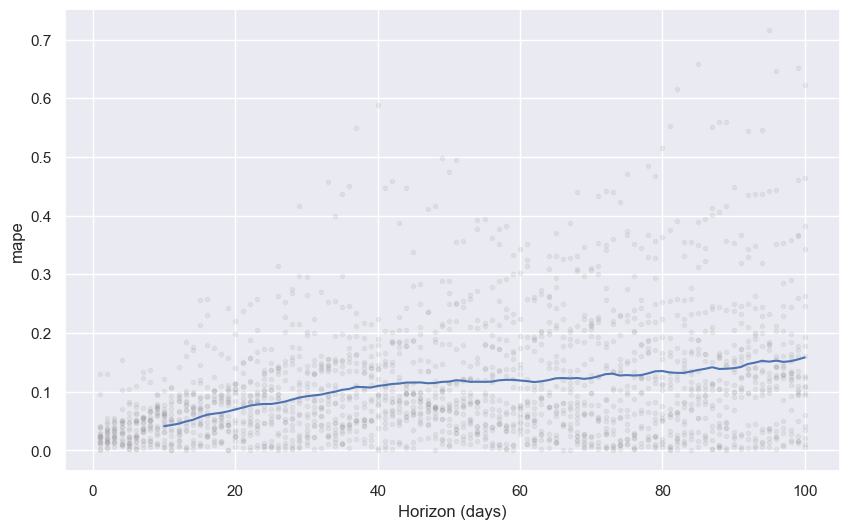

In [75]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mape')

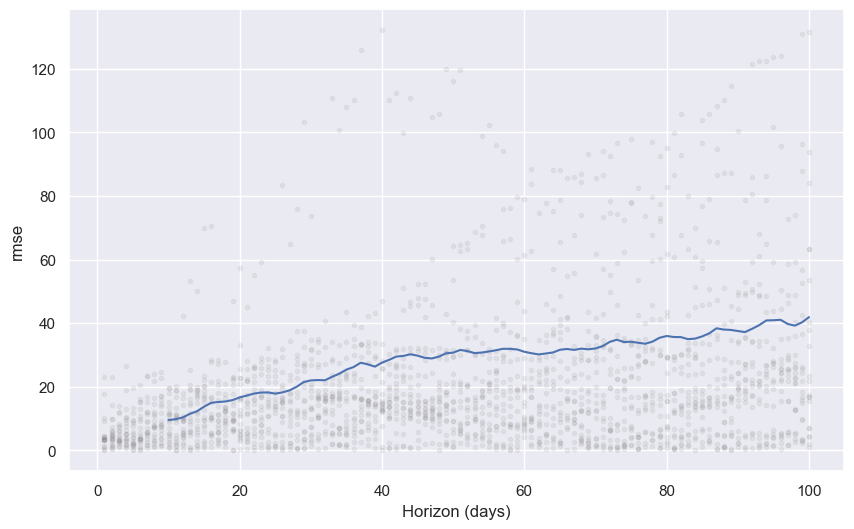

In [76]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')

In [77]:
df_prophet

,ds,y
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [78]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,145.820279,124.731634,145.986744,145.820279,145.820279,-9.982890,-9.982890,-9.982890,0.360747,0.360747,0.360747,-10.343637,-10.343637,-10.343637,0.0,0.0,0.0,135.837389
1,2015-05-28,145.711868,124.907640,144.530430,145.711868,145.711868,-10.678666,-10.678666,-10.678666,0.138849,0.138849,0.138849,-10.817515,-10.817515,-10.817515,0.0,0.0,0.0,135.033202
2,2015-05-29,145.603457,124.246630,143.852246,145.603457,145.603457,-11.445482,-11.445482,-11.445482,-0.153798,-0.153798,-0.153798,-11.291683,-11.291683,-11.291683,0.0,0.0,0.0,134.157975
3,2015-06-01,145.278223,122.412408,142.960571,145.278223,145.278223,-13.029754,-13.029754,-13.029754,-0.365012,-0.365012,-0.365012,-12.664742,-12.664742,-12.664742,0.0,0.0,0.0,132.248469
4,2015-06-02,145.169811,120.849449,142.566973,145.169811,145.169811,-13.055257,-13.055257,-13.055257,0.035476,0.035476,0.035476,-13.090733,-13.090733,-13.090733,0.0,0.0,0.0,132.114554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,400.921396,12.098628,792.214336,14.477574,801.191685,-7.028100,-7.028100,-7.028100,0.035476,0.035476,0.035476,-7.063575,-7.063575,-7.063575,0.0,0.0,0.0,393.893296
1619,2021-05-19,401.195360,11.851801,792.442827,12.818805,803.081645,-6.970930,-6.970930,-6.970930,0.360747,0.360747,0.360747,-7.331677,-7.331677,-7.331677,0.0,0.0,0.0,394.224430
1620,2021-05-20,401.469325,7.329074,796.654082,11.509303,804.851520,-7.500271,-7.500271,-7.500271,0.138849,0.138849,0.138849,-7.639120,-7.639120,-7.639120,0.0,0.0,0.0,393.969053
1621,2021-05-21,401.743289,5.306687,798.652102,10.377996,806.621395,-8.136879,-8.136879,-8.136879,-0.153798,-0.153798,-0.153798,-7.983080,-7.983080,-7.983080,0.0,0.0,0.0,393.606411
